<a href="https://colab.research.google.com/github/shreejitp/Moving-Beyond-Linearity/blob/master/Exp_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted: [1.02382589 0.04946656]
Expected : [1.0, 0.05]


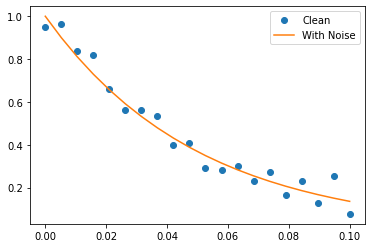

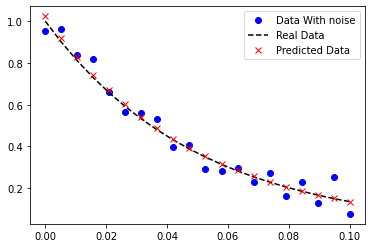

In [ ]:
# Objective
# Use non-linear curve fitting to estimate the relaxation rate of an exponential
# decaying signal.

# Steps
# 1. Simulate data (instead of collecting data)
# 2. Define the objective function for the least squares algorithm
# 3. Perform curve fitting
# 4. Compare results

# modules
import numpy as np
import matplotlib.pyplot as plt
from   scipy import optimize
# 1. Simulate some data
# In the real worls we would collect some data, but we can use simulated data
# to make sure that our fitting routine works and recovers the parameters used
# to simulate the data
def exp_decay(parameters,xdata):
    '''
    Calculate an exponetial decay of the form:
    S= a * exp(-xdata/b)
    '''
    a = parameters[0]
    b = parameters[1]
    return a * np.exp(-xdata/b)

xdata = np.linspace(0,.1,20)
A = 1.0
B = .050
parameters_used = [A,B]
y_data = exp_decay(parameters_used,xdata)

# Add Gaussian noise with mean = 0, and std. dev = 0.05
y_data_with_noise = y_data + np.random.normal(0,.05,(len(y_data)))

# Plot the simulated data
plt.plot(xdata,y_data_with_noise,'o',xdata,y_data,'-')
plt.legend(('Clean','With Noise'))

# 2. Define the objective function for the least squares algorithm
# The scipy.optimize.least_square requires the following inputs

# A) Objective function that computes the residuals of the
#     predicted data vs the observed data using the following syntaxis:
#     f = fun(parameters, *args, **kwargs),

def residuals(parameters,x_data,y_observed,func):
    '''
    Compute residuals of y_predicted - y_observed
    where:
    y_predicted = func(parameters,x_data)
    '''
    return func(parameters,x_data) - y_observed

# 3. Perform curve fitting
#    Initial guess for the parameters to be estimated
#    The parameters follow the same order than exp_decay
x0 = [1, 1]

#    Lower and uppers bounds
lb = [0,0]
ub = [2,2]

# estimate parameters in exp_decay
OptimizeResult  = optimize.least_squares(residuals,  x0, bounds = (0,2),
                                          args   = ( xdata, y_data_with_noise,exp_decay) )
parameters_estimated = OptimizeResult.x

# Estimate data based on the solution found
y_data_predicted = exp_decay(parameters_estimated,xdata)

# Plot all together
plt.figure(2)
plt.plot(xdata,y_data_with_noise,'ob',
         xdata,y_data           ,'--k',
         xdata,y_data_predicted ,'xr')
plt.legend(('Data With noise','Real Data','Predicted Data'))

# How good are the parameters I estimated?
print( 'Predicted: ' + str( parameters_estimated))
print( 'Expected : ' + str( parameters_used))

Parameters [ 2. -2.  1.]
RMSE: 0.0
R-squared: 1.0



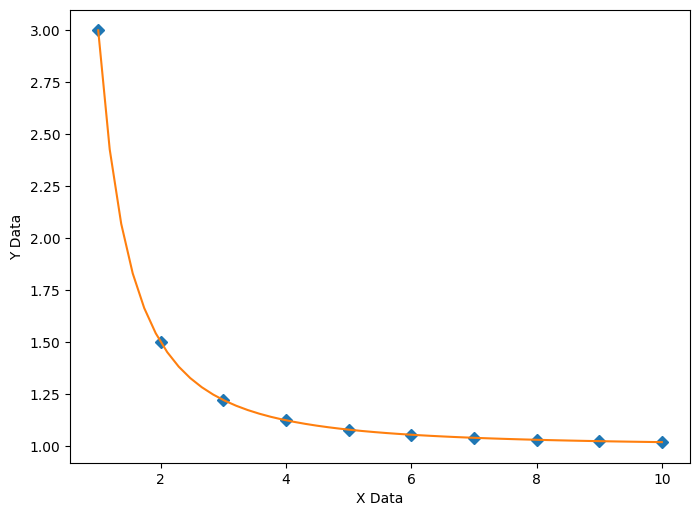

In [ ]:
# https://stackoverflow.com/questions/52356128/how-to-set-up-the-initial-value-for-curve-fit-to-find-the-best-optimizing-not-j
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# power law function
def func_power_law(x,a,b,c):
    return a*(x**b)+c

test_X = [1.0,2,3,4,5,6,7,8,9,10]
test_Y =[3.0,1.5,1.2222222222222223,1.125,1.08,1.0555555555555556,1.0408163265306123,1.03125, 1.0246913580246915,1.02]


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func_power_law(test_X, *parameterTuple)
    return numpy.sum((test_Y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(test_X)
    minX = min(test_X)
    maxY = max(test_Y)
    minY = min(test_Y)
    maxXY = max(maxX, maxY)

    parameterBounds = []
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for a
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for b
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func_power_law, test_X, test_Y, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func_power_law(test_X, *fittedParameters) 

absError = modelPredictions - test_Y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(test_Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(test_X, test_Y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(test_X), max(test_X))
    yModel = func_power_law(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)